![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)
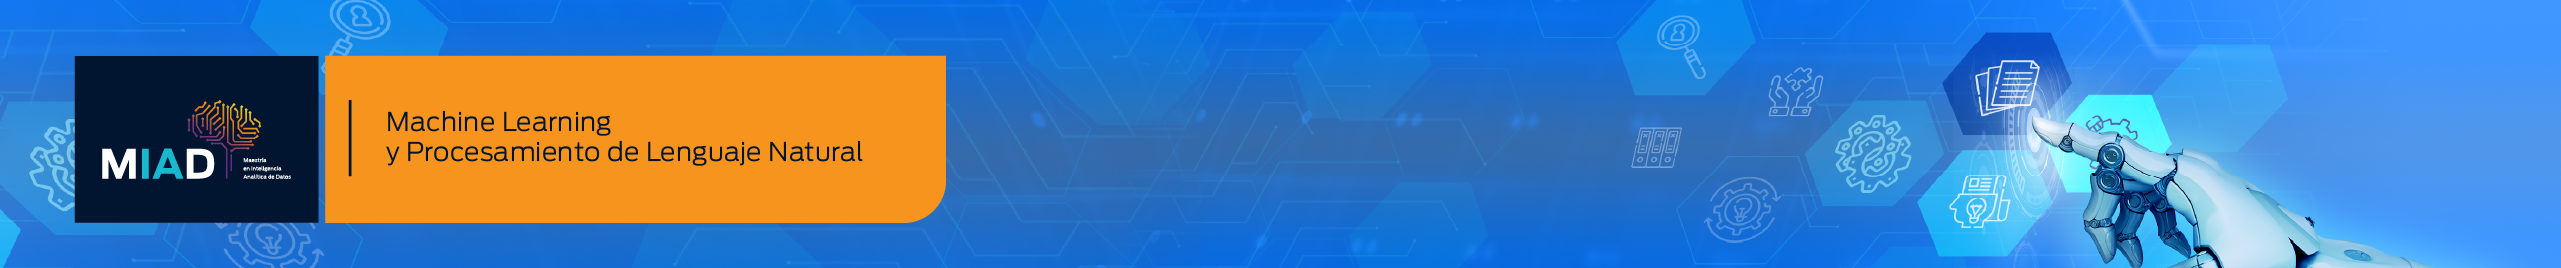

# Tokenización de textos  

En este notebook aprenderá a tokenizar un texto usando la librería especializada sklearn y [nltk](https://www.nltk.org/).

Este notebook tiene la licencia de [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Un agradecimiento especial para [Kevin Markham](https://github.com/justmarkham)

## Instrucciones Generales:

La tokenización es un proceso primordial para la limpieza de datos de texto que permite mejorar el performance de los modelos predictivos de procesamiento de lenguaje natural. Por medio de este notebook deberá tokenizar el texto del set de noticias populares de UCL. Para conocer más detalles de la base puede ingresar al siguiente [vínculo](https://archive.ics.uci.edu/ml/datasets/online+news+popularity#).
   
Para realizar la actividad, solo siga las indicaciones asociadas a cada celda del notebook. 

### Importar base de datos y librerías

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable_texts.csv', index_col=0)
df.head()

### Crear varaible de interés

In [ ]:
# Separación de variable de interés (y)
y = df.shares
y.describe()

In [ ]:
# Categoización de la variable de interés (y)
y = pd.cut(y, [0, 893, 1200, 2275, 63200], labels=[0, 1, 2, 3])
y.value_counts()

In [ ]:
# Definición de variable de interés en el dataframe
df['y'] = y

### Crear variables predictoras X_A - tokenización sin limpieza

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.text

In [ ]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X)
temp_A=X_dtm_A.todense()

In [ ]:
# Visualización de diccionario de palabras con su respectivo ID asignado
vect_A.vocabulary_

In [ ]:
# Impresión de dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_A.shape

In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_A.get_feature_names()[-150:-100])

### Crear variables predictoras X_B - tokenización con limpieza de mayúsculas

In [ ]:
# Creación de matrices de documentos usando CountVectorizer a partir de X, volviendo todas la palabras en minúscula
# a partir del parámetro 'lowercase=False' 
vect_B = CountVectorizer(lowercase=False)
X_dtm_B = vect_B.fit_transform(X)

In [ ]:
# Impresión dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_B.shape

In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_B.get_feature_names()[-150:-100])

### Crear variables predictoras X_C - tokenización con limpieza de mayúsculas y usando n-gramas

In [ ]:
# Creación de matrices de documentos usando CountVectorizer a partir de X y usando n-gramas
# a partir del parámetro 'ngram_range=(1, 4)' 
vect_C = CountVectorizer(lowercase=False, ngram_range=(1, 4))
X_dtm_C = vect_C.fit_transform(X)

In [ ]:
# Impresión de dimensiones de matriz de documentos, donde las filas son documentos y las columnas son términos o tokens
X_dtm_C.shape

In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_C.get_feature_names()[-150:-100])

###  Entrenar modelo de predicción con diferentes matrices de palabras (variables predictoras)

In [ ]:
# Definición de modelo Naive Bayes para predecir la varaible 'y' y variables predictoras x_A
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X_dtm_A, y, cv=10)).describe()

In [ ]:
# Definición de modelo Naive Bayes para predecir la varaible 'y' y variables predictoras x_B
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X_dtm_B, y, cv=10)).describe()

In [ ]:
# Definición de modelo Naive Bayes para predecir la varaible 'y' y variables predictoras x_B
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X_dtm_C, y, cv=10)).describe()